# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

import pydotplus
from IPython.display import Image


# Load CSV file

In [2]:
df=pd.read_csv("data/golf_df.csv")
df

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


# One Hot Encode

In [3]:
df_encoded = pd.get_dummies(df, columns=['Outlook', 'Temperature', 'Humidity'])
df_encoded['Play'] = df_encoded['Play'].map({'no': 0, 'yes': 1})

In [4]:
df_encoded = df_encoded.astype(int)
df_encoded

,Windy,Play,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal
0,0,0,0,0,1,0,1,0,1,0
1,1,0,0,0,1,0,1,0,1,0
2,0,1,1,0,0,0,1,0,1,0
3,0,1,0,1,0,0,0,1,1,0
4,0,1,0,1,0,1,0,0,0,1
5,1,0,0,1,0,1,0,0,0,1
6,1,1,1,0,0,1,0,0,0,1
7,0,0,0,0,1,0,0,1,1,0
8,0,1,0,0,1,1,0,0,0,1
9,0,1,0,1,0,0,0,1,0,1


# Define X and Y

In [5]:
X = df_encoded.drop(columns="Play")
Y = df_encoded["Play"]

In [6]:
x=X.values
y=Y.values

In [7]:
print("***** X-Values *****")
print(x)
print("***** It's Shape *****")
print(x.shape)
print("*****Y-Values*****")
print(y)
print("***** It's Shape *****")
print(y.shape)


***** X-Values *****
[[0 0 0 1 0 1 0 1 0]
 [1 0 0 1 0 1 0 1 0]
 [0 1 0 0 0 1 0 1 0]
 [0 0 1 0 0 0 1 1 0]
 [0 0 1 0 1 0 0 0 1]
 [1 0 1 0 1 0 0 0 1]
 [1 1 0 0 1 0 0 0 1]
 [0 0 0 1 0 0 1 1 0]
 [0 0 0 1 1 0 0 0 1]
 [0 0 1 0 0 0 1 0 1]
 [1 0 0 1 0 0 1 0 1]
 [1 1 0 0 0 0 1 1 0]
 [0 1 0 0 0 1 0 0 1]
 [1 0 1 0 0 0 1 1 0]]
***** It's Shape *****
(14, 9)
*****Y-Values*****
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]
***** It's Shape *****
(14,)


# Instantiate DecisionTreeClassifier

In [8]:
model=DecisionTreeClassifier(criterion='entropy')

In [9]:
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

# Visualize Graph

# Download Graphviz from link:
    https://graphviz.org/download/

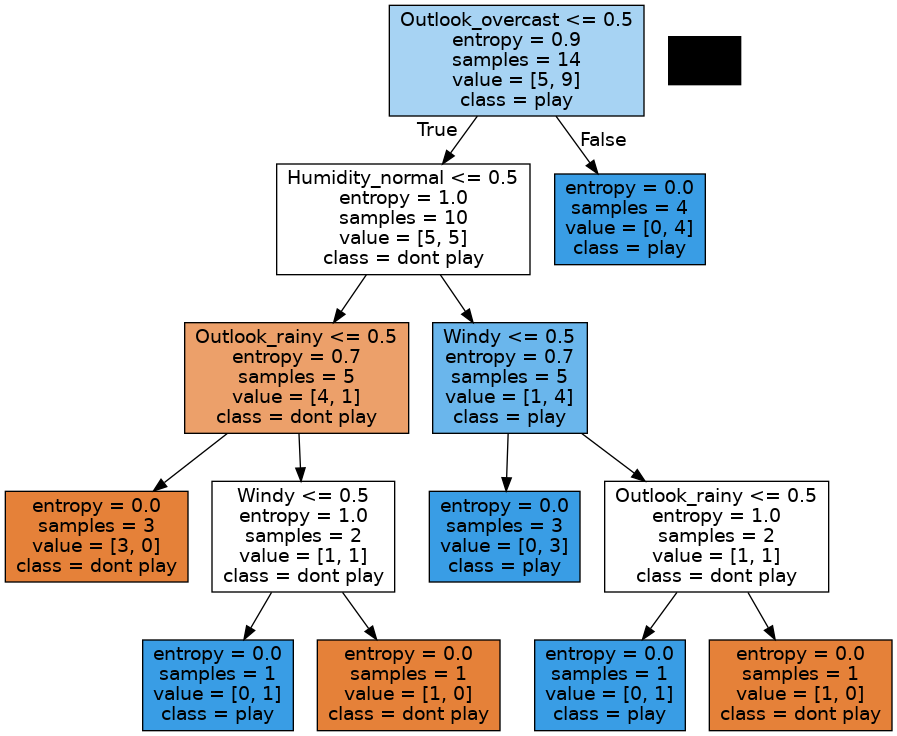

In [10]:
data_plot = tree.export_graphviz(model, out_file=None, feature_names = list(X.columns.values), class_names=['dont play', 'play'], 
                                 rounded=False, filled=True, precision=1)
graph = pydotplus.graph_from_dot_data(data_plot)

Image(graph.create_png())

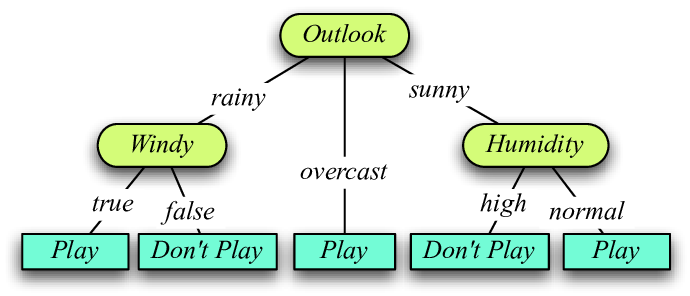

# Predict

In [11]:
model.predict([[0, 1, 0, 0, 0, 1, 0, 0, 1]])

array([1])